In [1]:
# !pip install missingno
# !pip install mlxtend


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

2023-11-26 10:25:32.543262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 10:25:36.555373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv('dataset_log_attacker-svr.csv')
df.head(10)

,dt,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,label
0,11425,172.16.10.1,172.16.10.8,45304,48294064,100,716000000,101000000000,3,1943,13535,0,UDP,3,143928631,3917,0,0
1,11605,172.16.10.1,172.16.10.8,126395,134737070,280,734000000,281000000000,2,1943,13531,0,UDP,4,3842,3520,0,0
2,11425,172.16.10.2,172.16.10.8,90333,96294978,200,744000000,201000000000,3,1943,13534,0,UDP,1,3795,1242,0,0
3,11425,172.16.10.2,172.16.10.8,90333,96294978,200,744000000,201000000000,3,1943,13534,0,UDP,2,3688,1492,0,0
4,11425,172.16.10.2,172.16.10.8,90333,96294978,200,744000000,201000000000,3,1943,13534,0,UDP,3,3413,3665,0,0
5,11425,172.16.10.2,172.16.10.8,90333,96294978,200,744000000,201000000000,3,1943,13534,0,UDP,1,3795,1402,0,0
6,11425,172.16.10.1,172.16.10.8,45304,48294064,100,716000000,101000000000,3,1943,13535,0,UDP,4,3665,3413,0,0
7,11425,172.16.10.1,172.16.10.8,45304,48294064,100,716000000,101000000000,3,1943,13535,0,UDP,1,3775,1492,0,0
8,11425,172.16.10.1,172.16.10.8,45304,48294064,100,716000000,101000000000,3,1943,13535,0,UDP,2,3845,1402,0,0
9,11425,172.16.10.2,172.16.10.8,90333,96294978,200,744000000,201000000000,3,1943,13534,0,UDP,4,354583059,4295,16578,0


### Data Preprocessing

##Dataset

In [4]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 18 columns


#### Concise summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   dt          104345 non-null  int64 
 1   src         104345 non-null  object
 2   dst         104345 non-null  object
 3   pktcount    104345 non-null  int64 
 4   bytecount   104345 non-null  int64 
 5   dur         104345 non-null  int64 
 6   dur_nsec    104345 non-null  int64 
 7   tot_dur     104345 non-null  int64 
 8   flows       104345 non-null  int64 
 9   packetins   104345 non-null  int64 
 10  pktperflow  104345 non-null  int64 
 11  Pairflow    104345 non-null  int64 
 12  Protocol    104345 non-null  object
 13  port_no     104345 non-null  int64 
 14  tx_bytes    104345 non-null  int64 
 15  rx_bytes    104345 non-null  int64 
 16  tx_kbps     104345 non-null  int64 
 17  label       104345 non-null  int64 
dtypes: int64(15), object(3)
memory usage: 14.3+ MB


#### Descriptive statistics of dataset

In [6]:
df.describe()

,dt,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,label
count,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000
mean,17927.514169,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,0.390857
std,11977.642655,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,0.487945
min,2488.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000
25%,7098.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000
50%,11905.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000
75%,29952.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,1.000000
max,42935.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,1.000000


#### heatmap of missing values

<Axes: >

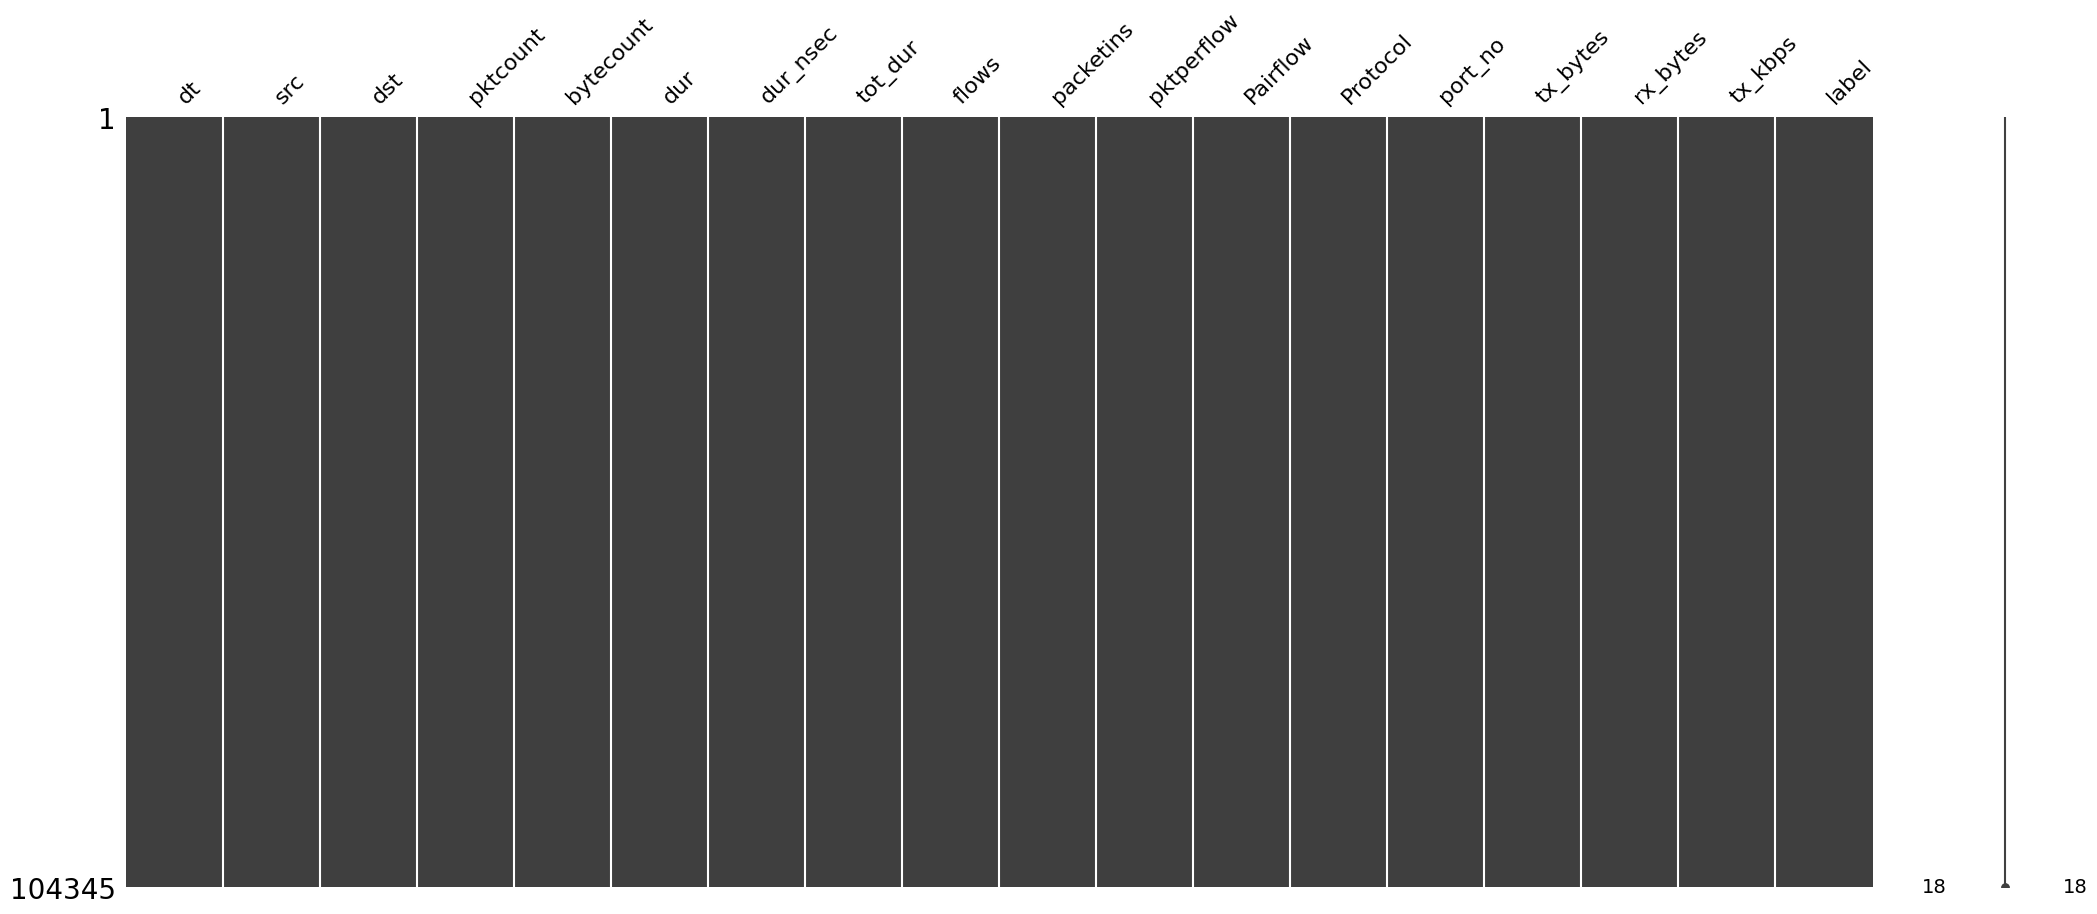

In [7]:
msno.matrix(df)

#### Count of null values in each feature 

In [8]:
df.isnull().sum()

dt            0
src           0
dst           0
pktcount      0
bytecount     0
dur           0
dur_nsec      0
tot_dur       0
flows         0
packetins     0
pktperflow    0
Pairflow      0
Protocol      0
port_no       0
tx_bytes      0
rx_bytes      0
tx_kbps       0
label         0
dtype: int64

In [9]:
(df.isnull().sum()/df.isnull().count())*100

dt            0.0
src           0.0
dst           0.0
pktcount      0.0
bytecount     0.0
dur           0.0
dur_nsec      0.0
tot_dur       0.0
flows         0.0
packetins     0.0
pktperflow    0.0
Pairflow      0.0
Protocol      0.0
port_no       0.0
tx_bytes      0.0
rx_bytes      0.0
tx_kbps       0.0
label         0.0
dtype: float64

#### Drop rows with null values

In [10]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [11]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt            0
src           0
dst           0
pktcount      0
bytecount     0
dur           0
dur_nsec      0
tot_dur       0
flows         0
packetins     0
pktperflow    0
Pairflow      0
Protocol      0
port_no       0
tx_bytes      0
rx_bytes      0
tx_kbps       0
label         0
dtype: int64
This Dataframe has 104345 rows and 18 columns after removing null values


#### Distribution of Target Class

In [12]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.09 %
Number of DDOS attacks that has not occured : 60.91 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

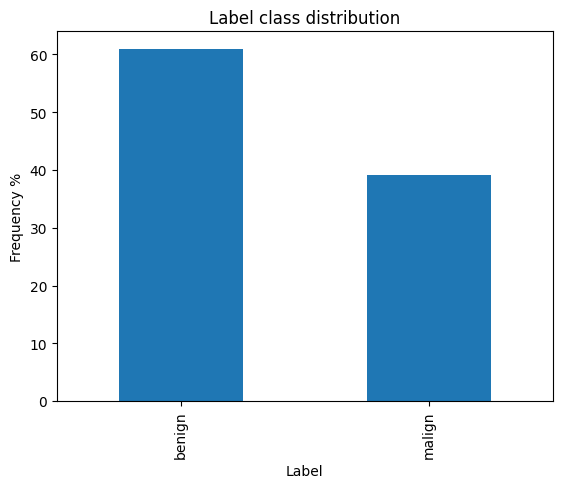

In [13]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

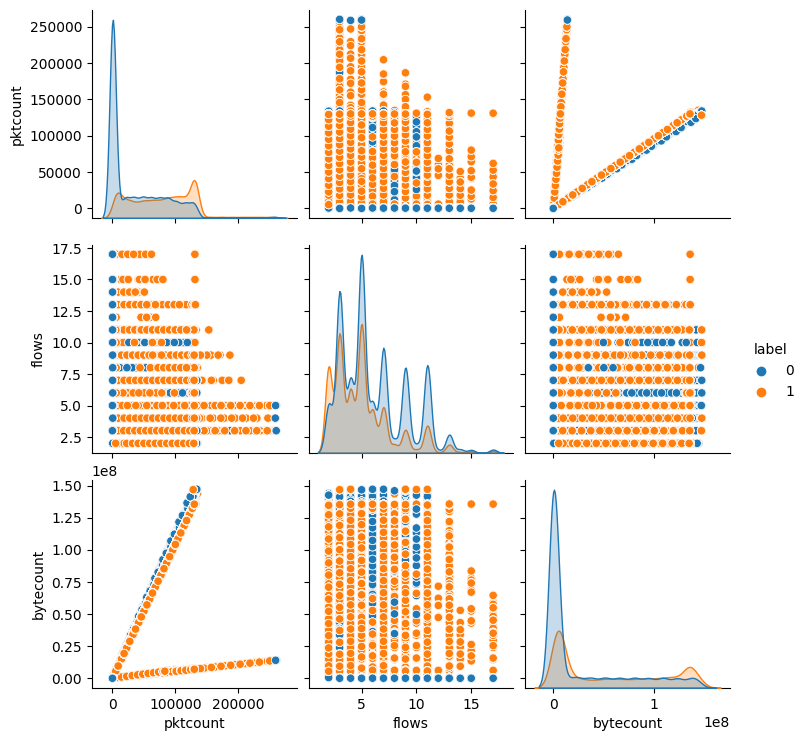

In [14]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [15]:
df.columns

Index(['dt', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec',
       'tot_dur', 'flows', 'packetins', 'pktperflow', 'Pairflow', 'Protocol',
       'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [16]:
print(df.apply(lambda col: col.unique()))

dt            [11425, 11605, 11455, 11515, 9906, 11335, 1157...
src           [172.16.10.1, 172.16.10.2, 172.16.10.4, 172.16...
dst           [172.16.10.8, 172.16.10.7, 172.16.10.3, 172.16...
pktcount      [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount     [48294064, 134737070, 96294978, 110721156, 913...
dur           [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec      [716000000, 734000000, 744000000, 747000000, 7...
tot_dur       [101000000000, 281000000000, 201000000000, 231...
flows         [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins     [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow    [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
Pairflow                                                 [0, 1]
Protocol                                       [UDP, TCP, ICMP]
port_no                                         [3, 4, 1, 2, 5]
tx_bytes      [143928631, 3842, 3795, 3688, 3413, 3665, 3775...
rx_bytes      [3917, 3520, 1242, 1492, 3

#### Numerical Features

In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'label']


#### Categorical Features

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features 

In [19]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt              859
pktcount       9045
bytecount      9271
dur             840
dur_nsec       1000
tot_dur        4183
flows            15
packetins       168
pktperflow     2092
Pairflow          2
port_no           5
tx_bytes      12257
rx_bytes      11625
tx_kbps        1800
label             2
dtype: int64

#### Discrete numerical features

In [20]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 3 and they are : 
 ['flows', 'Pairflow', 'port_no']


In [21]:
df[discrete_feature].head(10)

,flows,Pairflow,port_no
0,3,0,3
1,2,0,4
2,3,0,1
3,3,0,2
4,3,0,3
5,3,0,1
6,3,0,4
7,3,0,1
8,3,0,2
9,3,0,4


#### Continuous features

In [22]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 11 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'tx_bytes', 'rx_bytes', 'tx_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [23]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

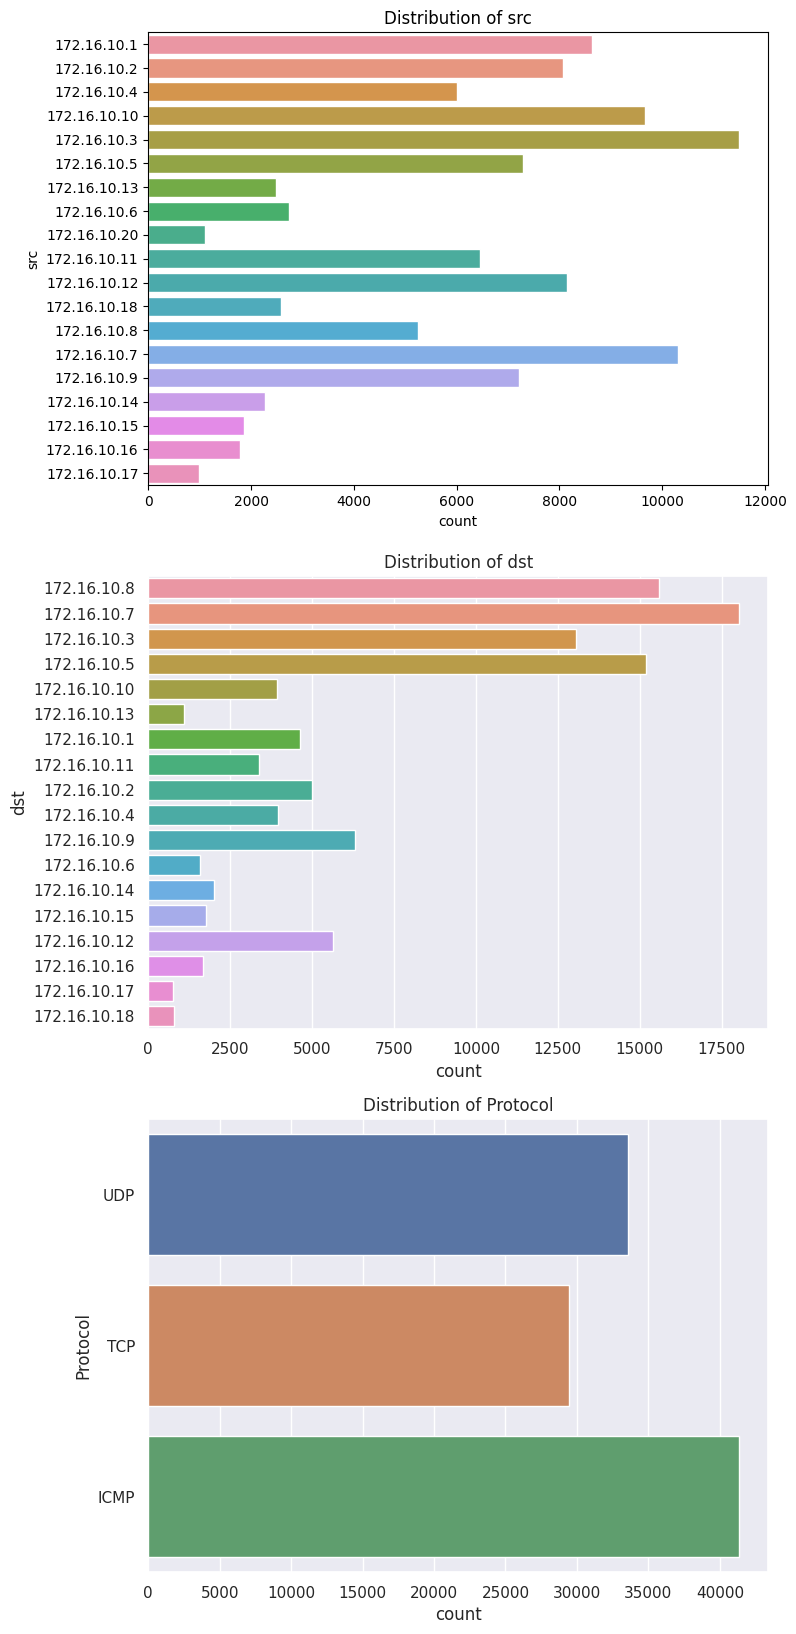

In [24]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

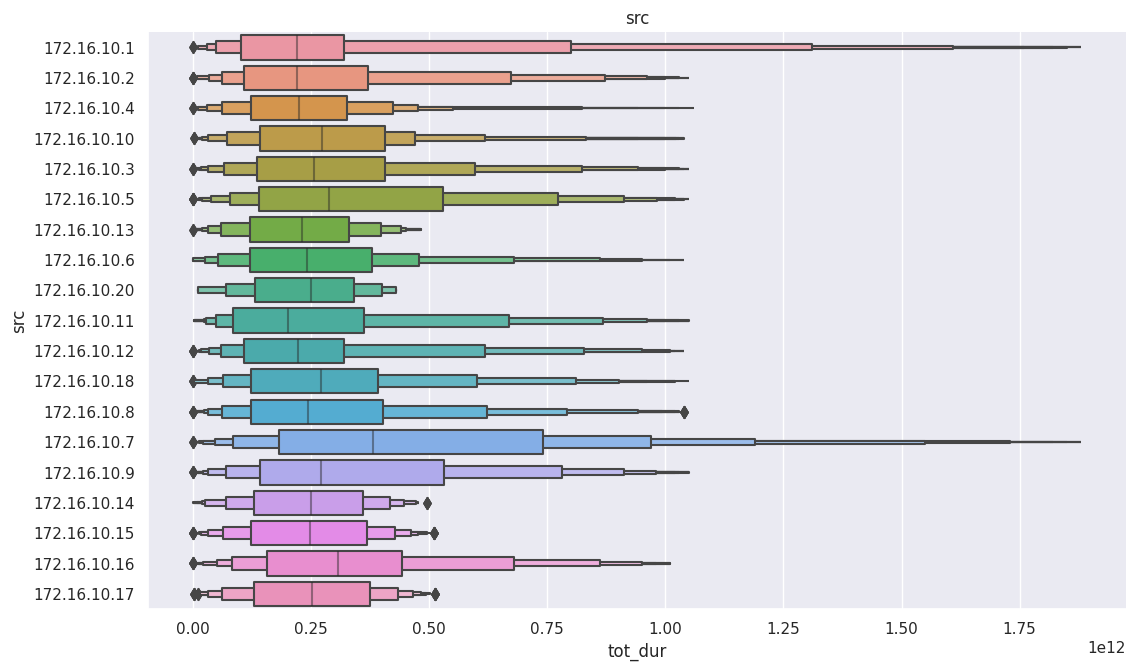

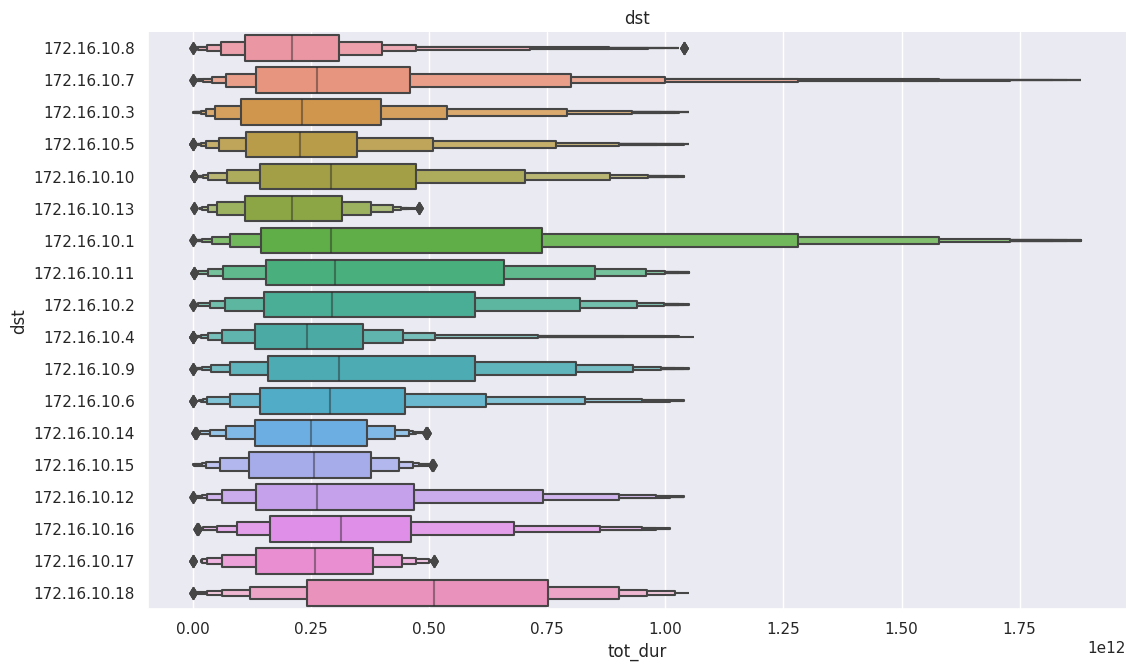

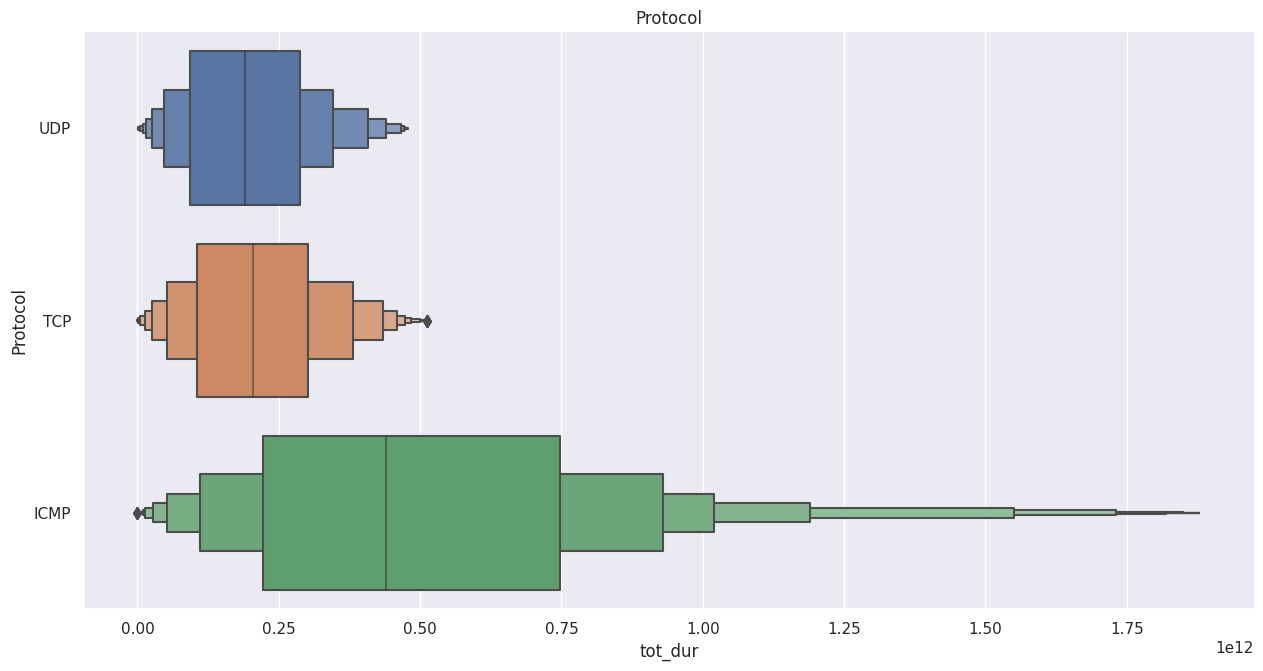

In [25]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=df,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

#### Visualize the distribution of continuous features

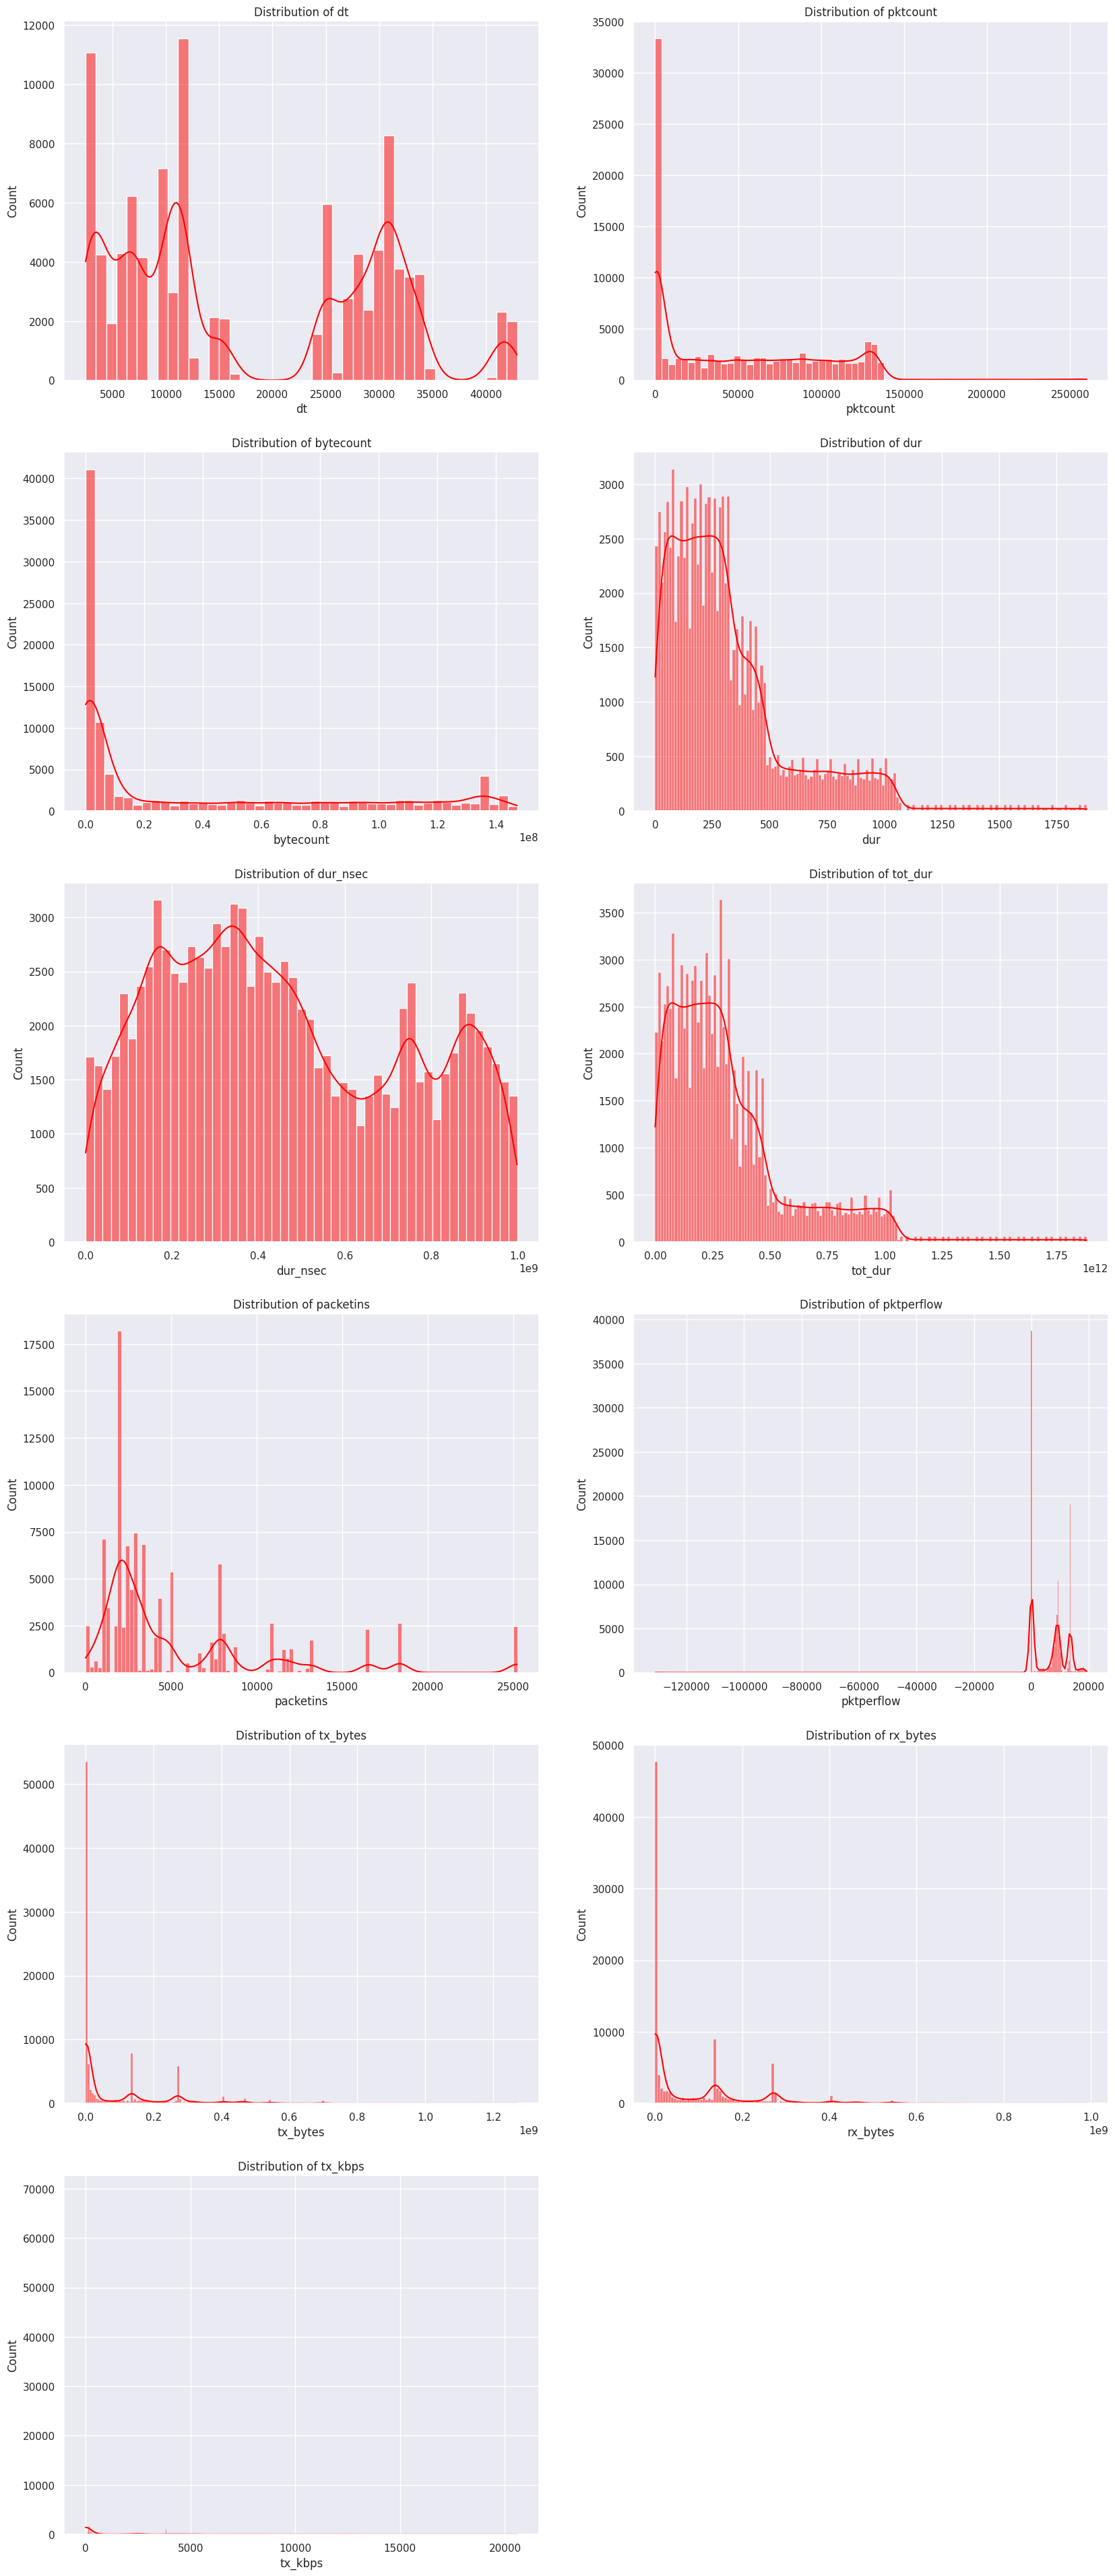

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 2000x2000 with 0 Axes>

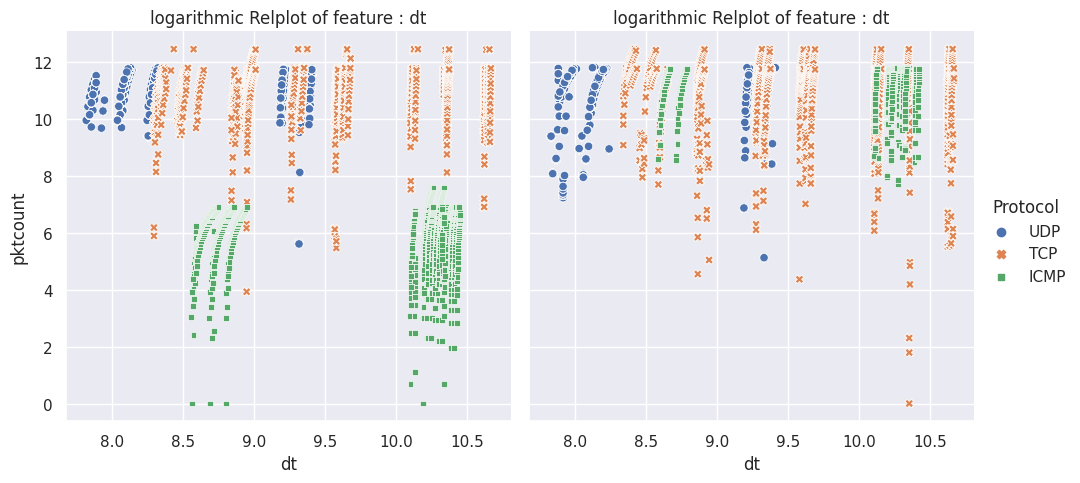

<Figure size 2000x2000 with 0 Axes>

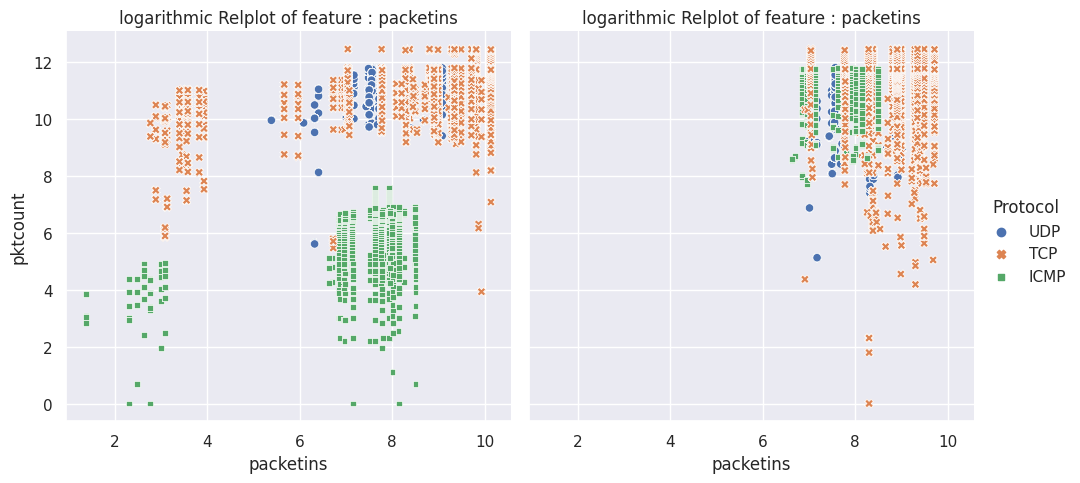

<Figure size 2000x2000 with 0 Axes>

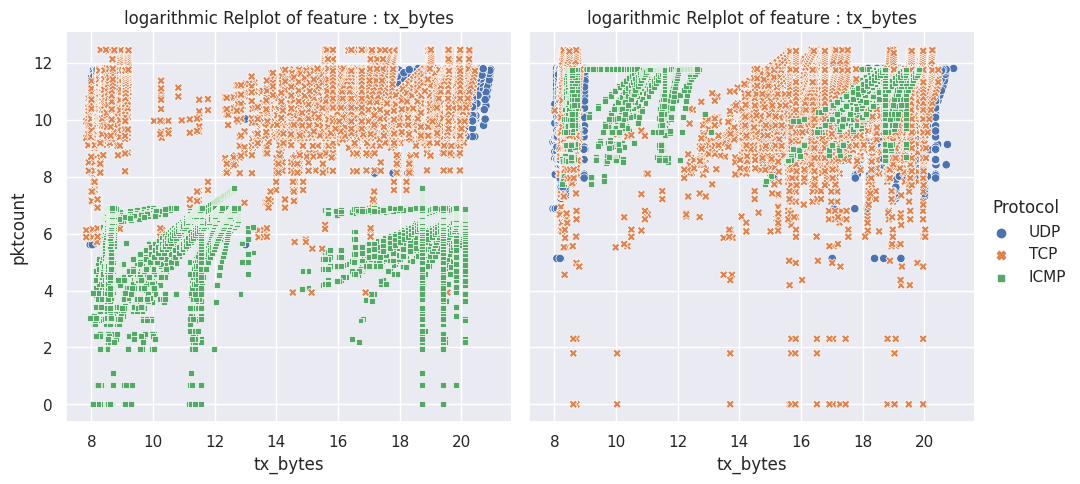

<Figure size 2000x2000 with 0 Axes>

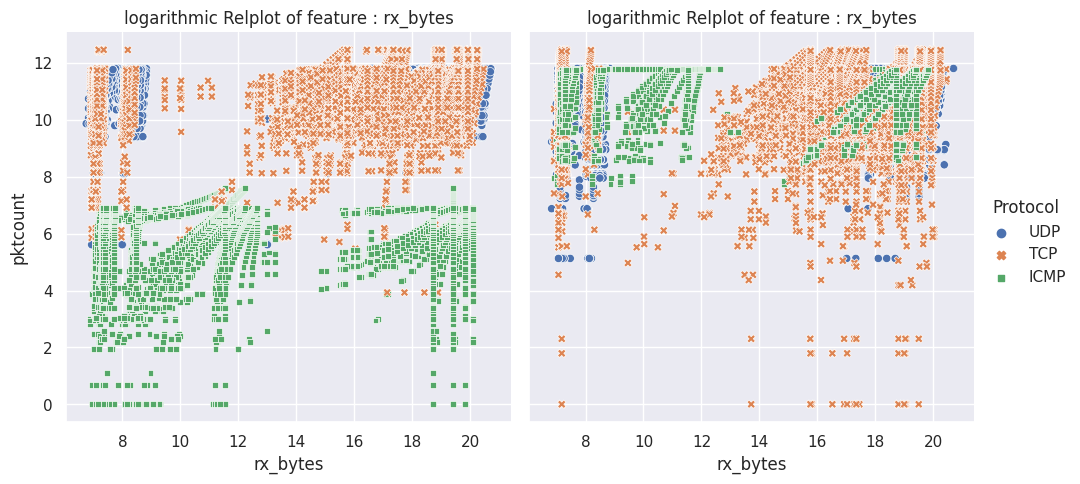

In [27]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

#### Visualize the distribution of numerical discrete features

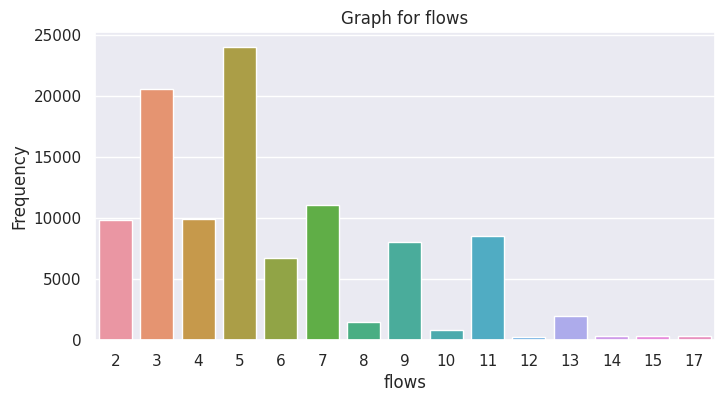

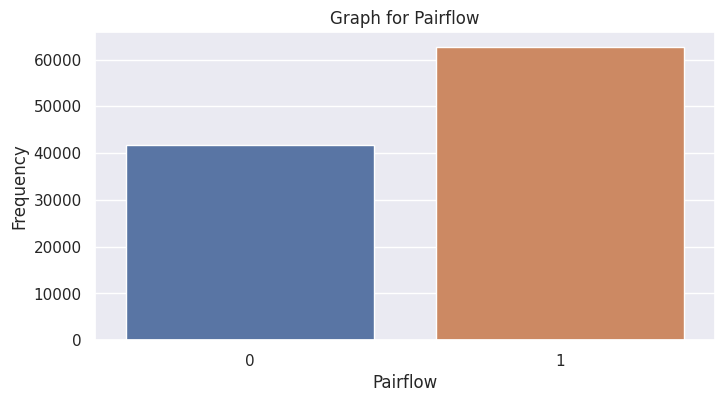

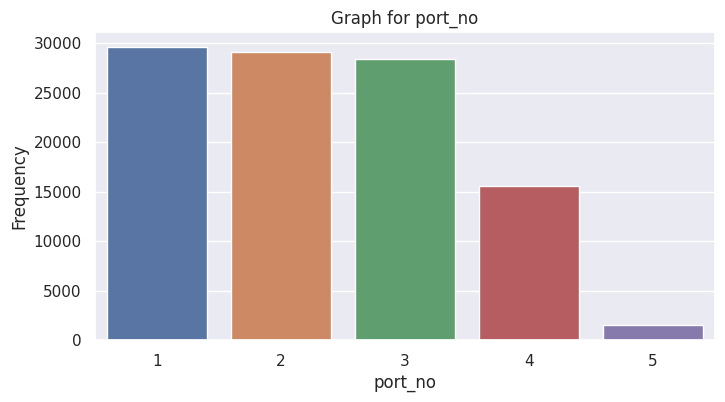

In [28]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [29]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

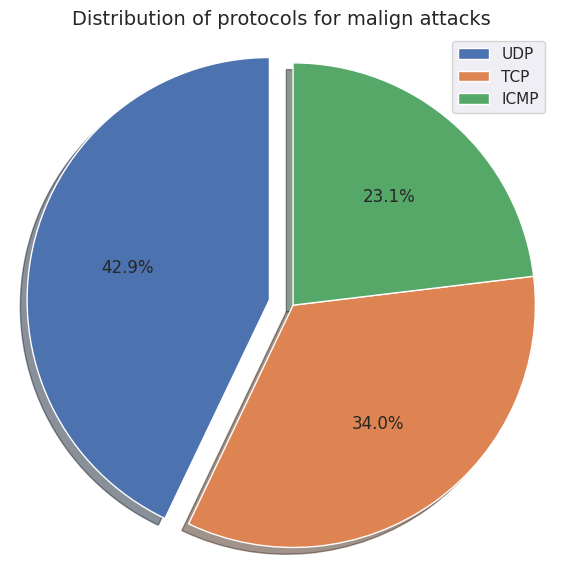

In [30]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

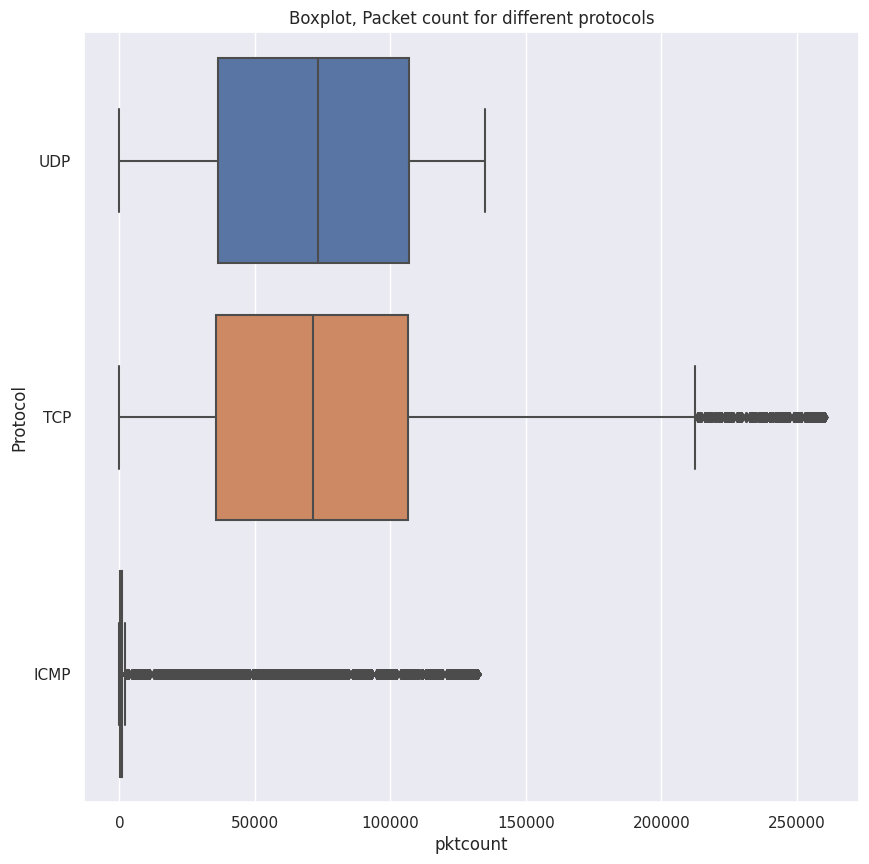

In [31]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

#### Heat map of correlation of features

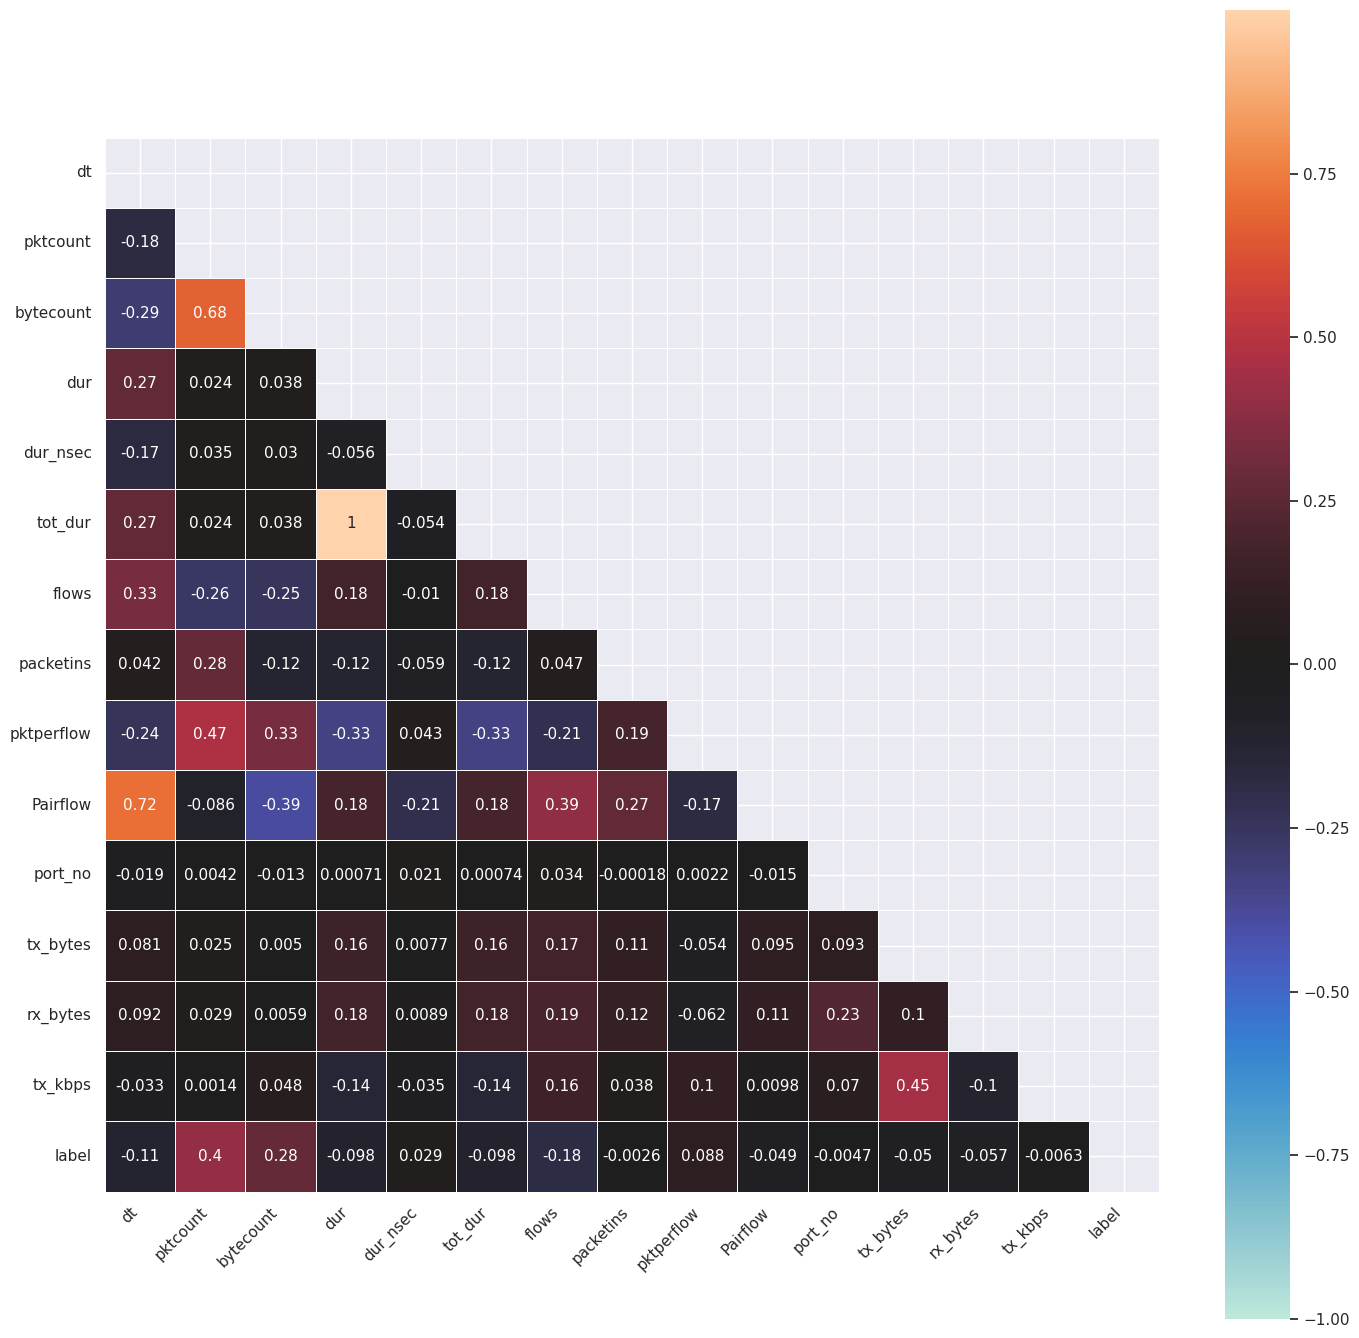

In [32]:
numeric_df = df.select_dtypes(include=[np.number])  # Memilih hanya kolom numerik
correlation_matrix = numeric_df.corr()

fig = plt.figure(figsize=(17, 17))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix, square=True, annot=True, center=0, vmin=-1, linewidths=0.5, annot_kws={"size": 11}, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


In [33]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [34]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 104345 rows and 52 columns after encoding


In [35]:
#dataframe after encoding
df.head(10)

,dt,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,Pairflow,...,dst_172.16.10.2,dst_172.16.10.3,dst_172.16.10.4,dst_172.16.10.5,dst_172.16.10.6,dst_172.16.10.7,dst_172.16.10.8,dst_172.16.10.9,Protocol_TCP,Protocol_UDP
0,11425,45304,48294064,100,716000000,101000000000,3,1943,13535,0,...,False,False,False,False,False,False,True,False,False,True
1,11605,126395,134737070,280,734000000,281000000000,2,1943,13531,0,...,False,False,False,False,False,False,True,False,False,True
2,11425,90333,96294978,200,744000000,201000000000,3,1943,13534,0,...,False,False,False,False,False,False,True,False,False,True
3,11425,90333,96294978,200,744000000,201000000000,3,1943,13534,0,...,False,False,False,False,False,False,True,False,False,True
4,11425,90333,96294978,200,744000000,201000000000,3,1943,13534,0,...,False,False,False,False,False,False,True,False,False,True
5,11425,90333,96294978,200,744000000,201000000000,3,1943,13534,0,...,False,False,False,False,False,False,True,False,False,True
6,11425,45304,48294064,100,716000000,101000000000,3,1943,13535,0,...,False,False,False,False,False,False,True,False,False,True
7,11425,45304,48294064,100,716000000,101000000000,3,1943,13535,0,...,False,False,False,False,False,False,True,False,False,True
8,11425,45304,48294064,100,716000000,101000000000,3,1943,13535,0,...,False,False,False,False,False,False,True,False,False,True
9,11425,90333,96294978,200,744000000,201000000000,3,1943,13534,0,...,False,False,False,False,False,False,True,False,False,True


In [36]:
df.dtypes

dt                  int64
pktcount            int64
bytecount           int64
dur                 int64
dur_nsec            int64
tot_dur             int64
flows               int64
packetins           int64
pktperflow          int64
Pairflow            int64
port_no             int64
tx_bytes            int64
rx_bytes            int64
tx_kbps             int64
label               int64
src_172.16.10.10     bool
src_172.16.10.11     bool
src_172.16.10.12     bool
src_172.16.10.13     bool
src_172.16.10.14     bool
src_172.16.10.15     bool
src_172.16.10.16     bool
src_172.16.10.17     bool
src_172.16.10.18     bool
src_172.16.10.2      bool
src_172.16.10.20     bool
src_172.16.10.3      bool
src_172.16.10.4      bool
src_172.16.10.5      bool
src_172.16.10.6      bool
src_172.16.10.7      bool
src_172.16.10.8      bool
src_172.16.10.9      bool
dst_172.16.10.10     bool
dst_172.16.10.11     bool
dst_172.16.10.12     bool
dst_172.16.10.13     bool
dst_172.16.10.14     bool
dst_172.16.1

### Split into Independent and dependent variables

In [37]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [38]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2 , random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((83476, 51), (83476,), (20869, 51), (20869,))

## BASELINE CLASSIFIERS
1. KNN
2. SVM
3. Random Forest

#### Classifier Accuracy

In [40]:
Classifier_accuracy = []

#### K-Nearest Neighbor Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Instantiate the KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the KNN model
knn_clf.fit(X_train, y_train)

# Make predictions
y_train_knn = knn_clf.predict(X_train)
y_test_knn = knn_clf.predict(X_test)

# Calculate accuracy
acc_train_knn = metrics.accuracy_score(y_train, y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test, y_test_knn)
Classifier_accuracy.append(acc_test_knn*100)
print("KNN: Accuracy on training data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test data: {:.3f}".format(acc_test_knn))
print()

# Calculate F1-score
f1_score_train_knn = metrics.f1_score(y_train, y_train_knn, average='macro')
f1_score_test_knn = metrics.f1_score(y_test, y_test_knn, average='macro')
print("KNN: F1-score on training data: {:.3f}".format(f1_score_train_knn))
print("KNN: F1-score on test data: {:.3f}".format(f1_score_test_knn))
print()

# Calculate recall
recall_score_train_knn = metrics.recall_score(y_train, y_train_knn, average='macro')
recall_score_test_knn = metrics.recall_score(y_test, y_test_knn, average='macro')
print("KNN: Recall on training data: {:.3f}".format(recall_score_train_knn))
print("KNN: Recall on test data: {:.3f}".format(recall_score_test_knn))
print()

# Calculate precision
precision_score_train_knn = metrics.precision_score(y_train, y_train_knn, average='macro')
precision_score_test_knn = metrics.precision_score(y_test, y_test_knn, average='macro')
print("KNN: Precision on training data: {:.3f}".format(precision_score_train_knn))
print("KNN: Precision on test data: {:.3f}".format(precision_score_test_knn))


KNN: Accuracy on training data: 0.979
KNN: Accuracy on test data: 0.966

KNN: F1-score on training data: 0.978
KNN: F1-score on test data: 0.965

KNN: Recall on training data: 0.977
KNN: Recall on test data: 0.963

KNN: Precision on training data: 0.979
KNN: Precision on test data: 0.966


#### SVM Classifier

In [42]:
from sklearn.svm import SVC
from sklearn import metrics

# Instantiate the SVM classifier
svc_clf = SVC()

# Fit the SVM model
svc_clf.fit(X_train, y_train)

# Make predictions
y_train_svm = svc_clf.predict(X_train)
y_test_svm = svc_clf.predict(X_test)

# Calculate accuracy
acc_train_svm = metrics.accuracy_score(y_train, y_train_svm)
acc_test_svm = metrics.accuracy_score(y_test, y_test_svm)
Classifier_accuracy.append(acc_test_svm*100)
print("SVM: Accuracy on training data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test data: {:.3f}".format(acc_test_svm))
print()

# Calculate F1-score
f1_score_train_svm = metrics.f1_score(y_train, y_train_svm, average='macro')
f1_score_test_svm = metrics.f1_score(y_test, y_test_svm, average='macro')
print("SVM: F1-score on training data: {:.3f}".format(f1_score_train_svm))
print("SVM: F1-score on test data: {:.3f}".format(f1_score_test_svm))
print()

# Calculate recall
recall_score_train_svm = metrics.recall_score(y_train, y_train_svm, average='macro')
recall_score_test_svm = metrics.recall_score(y_test, y_test_svm, average='macro')
print("SVM: Recall on training data: {:.3f}".format(recall_score_train_svm))
print("SVM: Recall on test data: {:.3f}".format(recall_score_test_svm))
print()

# Calculate precision
precision_score_train_svm = metrics.precision_score(y_train, y_train_svm, average='macro')
precision_score_test_svm = metrics.precision_score(y_test, y_test_svm, average='macro')
print("SVM: Precision on training data: {:.3f}".format(precision_score_train_svm))
print("SVM: Precision on test data: {:.3f}".format(precision_score_test_svm))


SVM: Accuracy on training data: 0.975
SVM: Accuracy on test data: 0.973

SVM: F1-score on training data: 0.973
SVM: F1-score on test data: 0.972

SVM: Recall on training data: 0.973
SVM: Recall on test data: 0.971

SVM: Precision on training data: 0.974
SVM: Precision on test data: 0.973


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Set a random seed for reproducibility
random_seed = 42
rf_clf = RandomForestClassifier(max_depth=4, random_state=random_seed)

# Fit the Random Forest model
rf_clf.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_rf = rf_clf.predict(X_train)
y_test_rf = rf_clf.predict(X_test)

# Calculate accuracy
acc_train_rf = metrics.accuracy_score(y_train, y_train_rf)
acc_test_rf = metrics.accuracy_score(y_test, y_test_rf)
Classifier_accuracy.append(acc_test_rf * 100)
print("Random Forest: Accuracy on training data: {:.3f}".format(acc_train_rf))
print("Random Forest: Accuracy on test data: {:.3f}".format(acc_test_rf))
print()

# Calculate F1-score
f1_score_train_rf = metrics.f1_score(y_train, y_train_rf, average='macro')
f1_score_test_rf = metrics.f1_score(y_test, y_test_rf, average='macro')
print("Random Forest: F1-score on training data: {:.3f}".format(f1_score_train_rf))
print("Random Forest: F1-score on test data: {:.3f}".format(f1_score_test_rf))
print()

# Calculate recall
recall_score_train_rf = metrics.recall_score(y_train, y_train_rf, average='macro')
recall_score_test_rf = metrics.recall_score(y_test, y_test_rf, average='macro')
print("Random Forest: Recall on training data: {:.3f}".format(recall_score_train_rf))
print("Random Forest: Recall on test data: {:.3f}".format(recall_score_test_rf))
print()

# Calculate precision
precision_score_train_rf = metrics.precision_score(y_train, y_train_rf, average='macro')
precision_score_test_rf = metrics.precision_score(y_test, y_test_rf, average='macro')
print("Random Forest: Precision on training data: {:.3f}".format(precision_score_train_rf))
print("Random Forest: Precision on test data: {:.3f}".format(precision_score_test_rf))


Random Forest: Accuracy on training data: 0.934
Random Forest: Accuracy on test data: 0.932

Random Forest: F1-score on training data: 0.931
Random Forest: F1-score on test data: 0.929

Random Forest: Recall on training data: 0.933
Random Forest: Recall on test data: 0.929

Random Forest: Precision on training data: 0.930
Random Forest: Precision on test data: 0.928


In [44]:
Classifier_names = ["KNN", "SVM", "Random Forest"]

In [45]:
import pandas as pd

# Set the number of top classifiers you want to display
top_n = 3  # Set to the number of top classifiers you want to display

# Truncate Classifier_names and Classifier_accuracy lists
Classifier_names = Classifier_names[:top_n]
Classifier_accuracy = Classifier_accuracy[:top_n]

# Create a DataFrame
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)


,name,Accuracy
1,SVM,97.340553
0,KNN,96.645742
2,Random Forest,93.214816


#### Visualize accuracies of the models

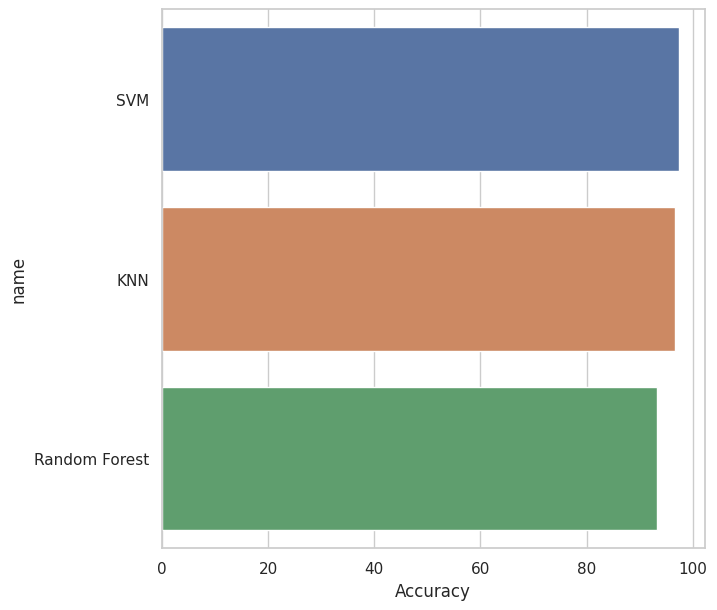

In [46]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

## Storing Best Model

In [47]:
# Import the necessary libraries
from sklearn.svm import SVC

# Instantiate the SVM classifier
svm = SVC()

# Fit the SVM model
svm.fit(X_train, y_train)


SVC()

In [48]:
import pickle

# dump information to that file
pickle.dump(svm, open('svm.pkl', 'wb'))

## Feature Selection

### Select Kbest

   Feature Name  SelectKBest
2           dst     0.612735
1           src     0.594373
8         flows     0.540001
0            dt     0.286436
5           dur     0.258394
11     Pairflow     0.198628
3      pktcount     0.198372
7       tot_dur     0.193927
12     Protocol     0.170478
4     bytecount     0.067471
13      port_no     0.067324
14     tx_bytes     0.026411
6      dur_nsec     0.026205
16      tx_kbps     0.007665
9     packetins     0.005863
15     rx_bytes     0.003844
10   pktperflow     0.001305


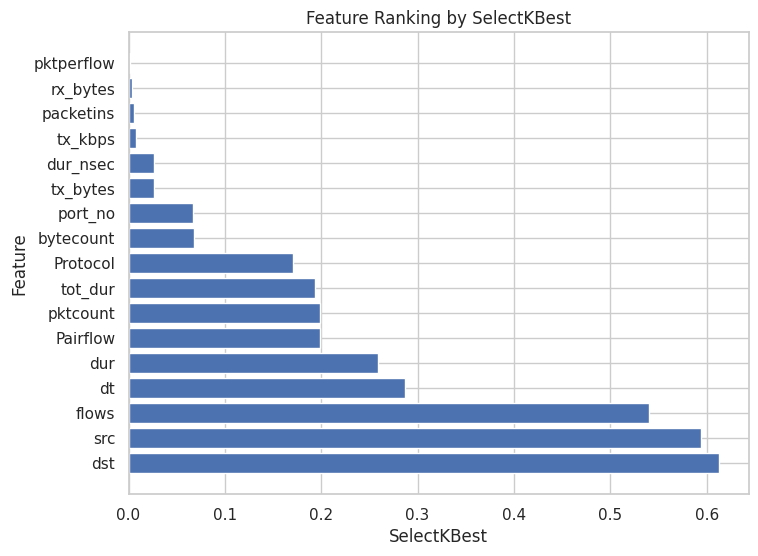

In [49]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Expected features
expected_features = ['dt', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
                     'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
                     'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps']

# Create a dictionary mapping column names to their indices
col_index_dict = {col: idx for idx, col in enumerate(expected_features)}

# Select subset of features
feature_indices = [col_index_dict[col] for col in expected_features]
X_train_subset = X_train[:, feature_indices]
X_test_subset = X_test[:, feature_indices]

# Menghitung Information Gain untuk setiap fitur
selector = SelectKBest(score_func=mutual_info_classif, k="all")
selector.fit(X_train_subset, y_train)

# Menampilkan skor Information Gain untuk setiap fitur
selectkbest_scores = selector.scores_

# Membuat tabel peringkat fitur
ranking_df = pd.DataFrame({'Feature Name': expected_features, 'SelectKBest': selectkbest_scores})
ranking_df = ranking_df.sort_values(by='SelectKBest', ascending=False)

# Cetak tabel peringkat fitur
print(ranking_df)

# Membuat plot feature ranking
plt.figure(figsize=(8, 6))
plt.barh(ranking_df['Feature Name'], ranking_df['SelectKBest'])
plt.xlabel("SelectKBest")
plt.ylabel("Feature")
plt.title("Feature Ranking by SelectKBest")
plt.show()
